In [6]:
import platform
platform.python_version()

'3.6.13'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 

In [8]:
!pip install pandas-profiling

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [9]:
import os
os.getcwd()

'/home/ec2-user/SageMaker/coles/endeavour'

In [258]:
df_train = pd.read_feather("../data/trainpy.feather")

In [259]:
df_train.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion'], dtype='object')

In [260]:
df_test = pd.read_csv("../data/test.csv") 
train_items = df_train['item_nbr'].unique()
test_items = df_test['item_nbr'].unique()

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))
 
items = intersection(train_items, test_items)
print(len(items))

#https://realpython.com/python-sets/
items_not_in_train = list(set(test_items).difference(train_items))
items_not_in_test = list(set(train_items).difference(test_items))
print("items not in train:", len(items_not_in_train))
print("items not in test (ignore):", len(items_not_in_test))

3841
items not in train: 60
items not in test (ignore): 195


In [261]:
itemlist = df_test['item_nbr'].unique()
len(itemlist)

3901

In [262]:
from random import sample
items = sample(list(itemlist),3)

In [263]:
item = items[0]

In [264]:
hols = pd.read_csv("../data/holidays_events.csv")
hols

date        type    locale locale_name  \
0    2012-03-02     Holiday     Local       Manta   
1    2012-04-01     Holiday  Regional    Cotopaxi   
2    2012-04-12     Holiday     Local      Cuenca   
3    2012-04-14     Holiday     Local    Libertad   
4    2012-04-21     Holiday     Local    Riobamba   
..          ...         ...       ...         ...   
345  2017-12-22  Additional  National     Ecuador   
346  2017-12-23  Additional  National     Ecuador   
347  2017-12-24  Additional  National     Ecuador   
348  2017-12-25     Holiday  National     Ecuador   
349  2017-12-26  Additional  National     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                             ...          ...  
345                      Navidad-3        False  
346                      Navidad-2        False  
347                      Navidad-1        False  
348                        Navidad        False  
349                      Navidad+1        False  

[350 rows x 6 columns]

In [265]:
hdf = hols[hols['locale_name'] == "Ecuador"]
hdf

date        type    locale locale_name  \
14   2012-08-10     Holiday  National     Ecuador   
19   2012-10-09     Holiday  National     Ecuador   
20   2012-10-12    Transfer  National     Ecuador   
21   2012-11-02     Holiday  National     Ecuador   
22   2012-11-03     Holiday  National     Ecuador   
..          ...         ...       ...         ...   
345  2017-12-22  Additional  National     Ecuador   
346  2017-12-23  Additional  National     Ecuador   
347  2017-12-24  Additional  National     Ecuador   
348  2017-12-25     Holiday  National     Ecuador   
349  2017-12-26  Additional  National     Ecuador   

                             description  transferred  
14         Primer Grito de Independencia        False  
19            Independencia de Guayaquil         True  
20   Traslado Independencia de Guayaquil        False  
21                       Dia de Difuntos        False  
22               Independencia de Cuenca        False  
..                                   ...          ...  
345                            Navidad-3        False  
346                            Navidad-2        False  
347                            Navidad-1        False  
348                              Navidad        False  
349                            Navidad+1        False  

[174 rows x 6 columns]

In [266]:
stores = pd.read_csv("../data/stores.csv")
stores['state'].value_counts()

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Manabi                             3
Azuay                              3
Tungurahua                         2
Cotopaxi                           2
El Oro                             2
Los Rios                           2
Loja                               1
Esmeraldas                         1
Pastaza                            1
Bolivar                            1
Santa Elena                        1
Chimborazo                         1
Imbabura                           1
Name: state, dtype: int64

In [267]:
stores.describe()

store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000

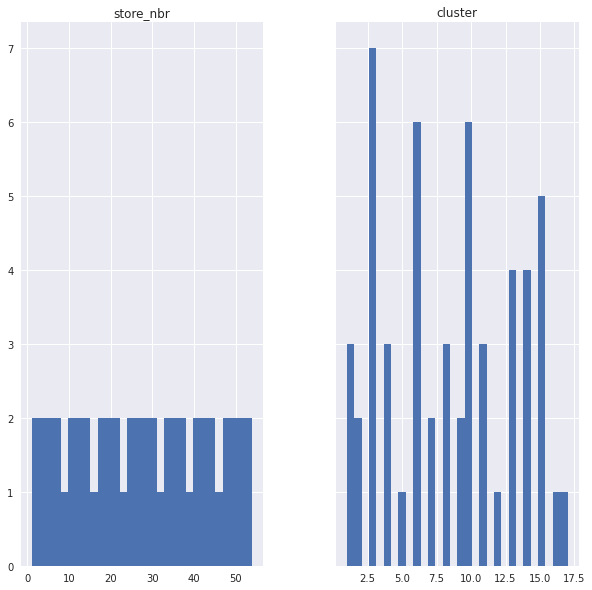

In [268]:
%matplotlib inline
hist = stores.hist(bins=30, sharey=True, figsize=(10, 10))

In [269]:
# Frequency tables for each categorical feature
for column in stores.select_dtypes(include=["object"]).columns:
    display(100 * pd.crosstab(index=stores[column], columns="% observations", normalize="columns"))

col_0          % observations
city                         
Ambato               3.703704
Babahoyo             1.851852
Cayambe              1.851852
Cuenca               5.555556
Daule                1.851852
El Carmen            1.851852
Esmeraldas           1.851852
Guaranda             1.851852
Guayaquil           14.814815
Ibarra               1.851852
Latacunga            3.703704
Libertad             1.851852
Loja                 1.851852
Machala              3.703704
Manta                3.703704
Playas               1.851852
Puyo                 1.851852
Quevedo              1.851852
Quito               33.333333
Riobamba             1.851852
Salinas              1.851852
Santo Domingo        5.555556

col_0                           % observations
state                                         
Azuay                                 5.555556
Bolivar                               1.851852
Chimborazo                            1.851852
Cotopaxi                              3.703704
El Oro                                3.703704
Esmeraldas                            1.851852
Guayas                               20.370370
Imbabura                              1.851852
Loja                                  1.851852
Los Rios                              3.703704
Manabi                                5.555556
Pastaza                               1.851852
Pichincha                            35.185185
Santa Elena                           1.851852
Santo Domingo de los Tsachilas        5.555556
Tungurahua                            3.703704

col_0  % observations
type                 
A           16.666667
B           14.814815
C           27.777778
D           33.333333
E            7.407407

In [272]:
item = items[1]
item = 454426

In [273]:
data = df_train.loc[(df_train['item_nbr'] == item) ]
data.to_csv("item454426.csv", index=False)

In [274]:
data.head()

id        date  store_nbr  item_nbr  unit_sales onpromotion
932    932  2013-01-02          1    454426         2.0        None
1964  1964  2013-01-02          2    454426         1.0        None
3101  3101  2013-01-02          3    454426         4.0        None
5307  5307  2013-01-02          5    454426         3.0        None
6355  6355  2013-01-02          6    454426         6.0        None

In [49]:
from pandas_profiling import ProfileReport
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [149]:
ts = data['unit_sales'].values

In [150]:
split = 0.8 * len(ts)
split = int(split)

lags = 50
start = lags
end = split
target_size = 16

In [151]:
def create_data_v(data, lags, start, end, target_size, dt):
    x_data = []
    y_data = [] 
    index = [i for i in range(0, len(data))]

    for i in range(start, end):
        x_data.append(data[i-lags:i])
        y_data.append(data[i:i+target_size])
        
        if (i < start + 5) or (i >= end - 5):
          print("i: %s (%s), x: %s-%s, y: %s-%s" % (i, dt.index[index[i]], i-lags, i-1, i, i+target_size))

    print(f"start: {start}, end: {end}, lags: {lags}, target_size {target_size}")
    print("\n")

    return(np.array(x_data), np.array(y_data))

In [152]:
X_train, y_train = create_data_v(ts, 12, 12, split, 12, data)

i: 12 (19135), x: 0-11, y: 12-24
i: 13 (20092), x: 1-12, y: 13-25
i: 14 (20880), x: 2-13, y: 14-26
i: 15 (21721), x: 3-14, y: 15-27
i: 16 (22618), x: 4-15, y: 16-28
i: 34532 (91766464), x: 34520-34531, y: 34532-34544
i: 34533 (91769345), x: 34521-34532, y: 34533-34545
i: 34534 (91771364), x: 34522-34533, y: 34534-34546
i: 34535 (91773666), x: 34523-34534, y: 34535-34547
i: 34536 (91776231), x: 34524-34535, y: 34536-34548
start: 12, end: 34537, lags: 12, target_size 12




In [153]:
X_train.shape

(34525, 12)

In [154]:
data['store_nbr'].value_counts()

51    1543
31    1483
39    1480
48    1479
45    1476
46    1422
27    1407
5     1396
44    1392
47    1387
50    1371
16    1324
24    1313
3     1240
41    1211
6     1172
28    1163
11    1126
34    1120
36    1092
38    1043
43    1014
4     1009
2      976
9      963
23     960
26     924
35     902
49     880
8      875
18     874
37     862
25     753
53     715
7      714
20     707
29     673
1      645
21     601
42     386
52      99
Name: store_nbr, dtype: int64

In [155]:
data.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

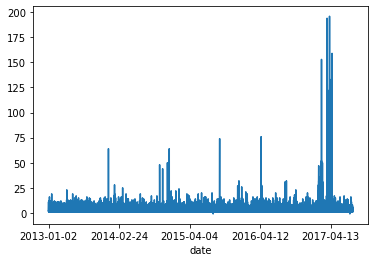

In [157]:
data['unit_sales'].plot()

In [158]:
stores = data['store_nbr'].unique()
#len(stores)
stores = np.sort(stores)

In [160]:
#data.set_index('date', inplace=True)
data.index = pd.to_datetime(data.index)

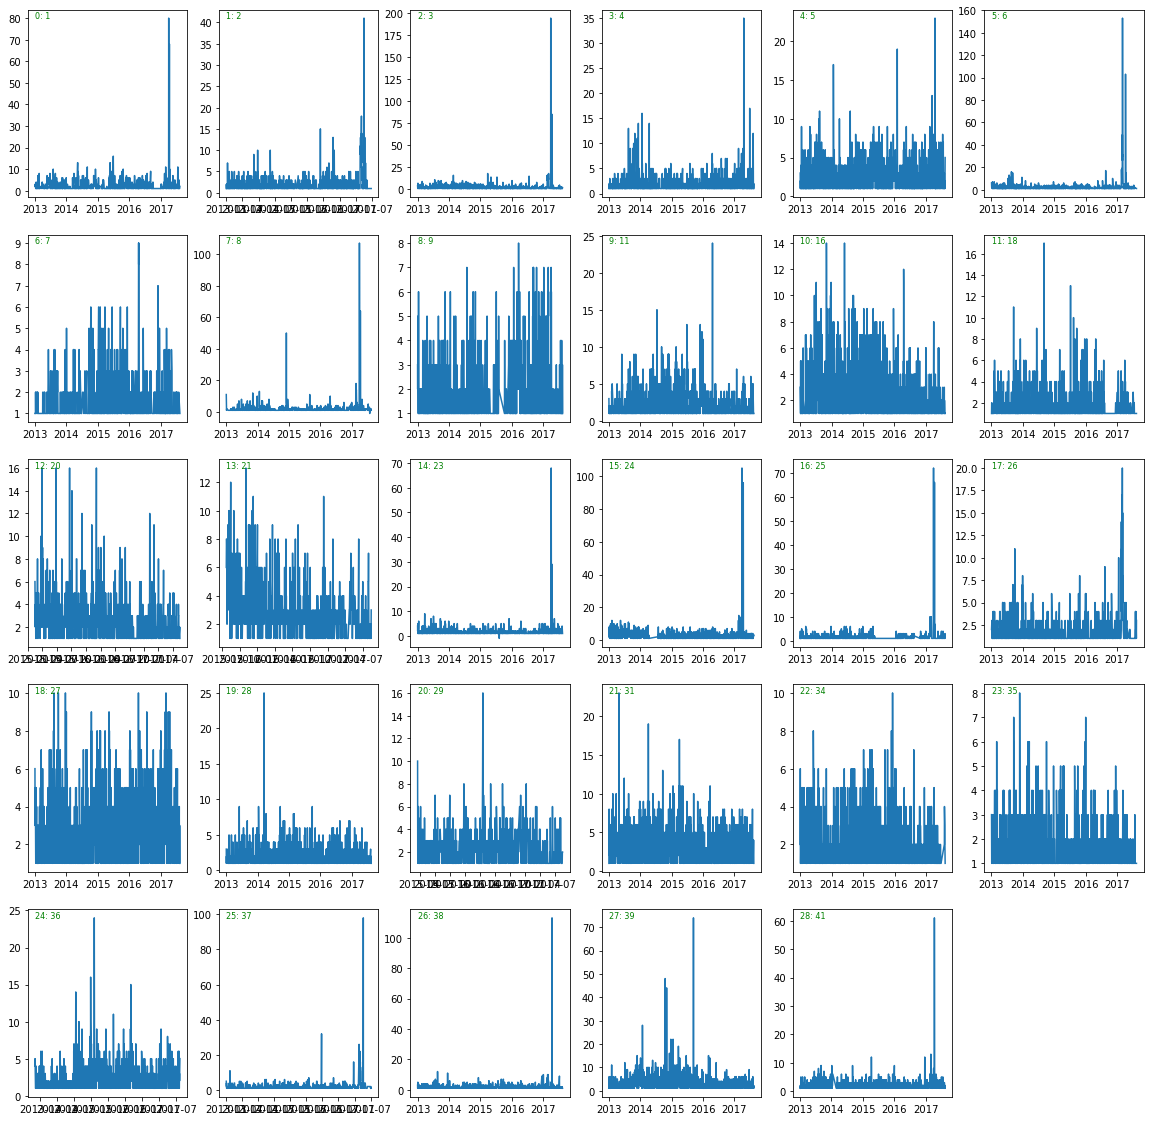

In [162]:
index = 0
fig, axs = plt.subplots(5, 6, figsize = (20,20))

for ax in axs.flatten():
    if index < 29:
        caption = '{}: {}'.format(index, stores[index])
        #print(caption)
        #ax.set_axis_off()
        ax.plot(data[data['store_nbr'] == stores[index]].index, data.loc[data['store_nbr'] == stores[index], 'unit_sales'])
        ax.text(min(data[data['store_nbr'] == stores[index]].index), max(data.loc[data['store_nbr'] == stores[index],'unit_sales']), caption, fontsize=8, color='g')
        
    else:
        ax.set_axis_off()
    index = index + 1

<AxesSubplot:xlabel='date'>

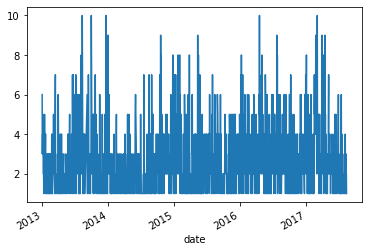

In [163]:
data.loc[data['store_nbr'] == 27,'unit_sales'].plot()

In [164]:
data.loc[data['store_nbr'] == 274,:].index

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)

In [172]:
df = data['unit_sales'].resample('W').sum()

In [178]:
dt = pd.DataFrame(df)

In [ ]:
from datetime import datetime
#datetime.strptime(str(x)[:7], '%Y-%m')

In [186]:
datetime.strptime('2017-08-01', '%Y-%m-%d')

datetime.datetime(2017, 8, 1, 0, 0)

In [194]:
#df_train.set_index('date', inplace=True)

In [199]:
data.columns

Index(['id', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion'], dtype='object')

In [203]:
data['onpromotion'].value_counts()
data['promo'] = data['onpromotion'].apply(lambda x : 100 if x else 0 )

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [206]:
dfp = data['promo'].resample('W').mean()
dfp = pd.DataFrame(dfp)

In [213]:
dfm = dt.join(dfp)

In [214]:
dt_train = dfm.loc[dfm.index < datetime.strptime('2017-08-01', '%Y-%m-%d')]

In [215]:
dt_train.tail()

unit_sales       promo
date                              
2017-07-02       428.0    0.584795
2017-07-09       545.0   73.737374
2017-07-16       459.0  100.000000
2017-07-23       495.0  100.000000
2017-07-30       366.0   47.239264

In [223]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (10, 8)

<AxesSubplot:xlabel='date'>

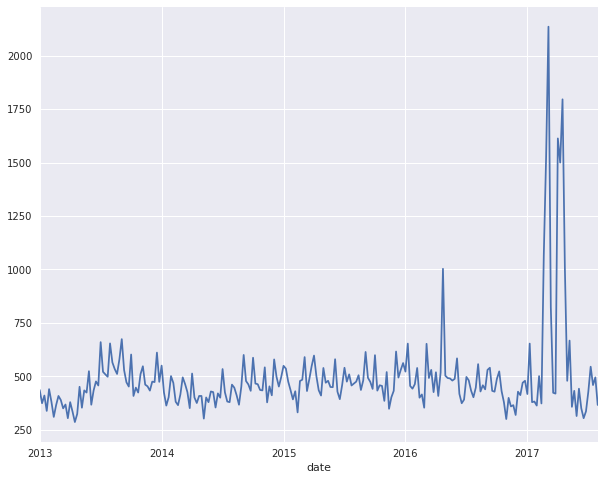

In [224]:
dt_train['unit_sales'].plot()

In [227]:
dt_train.reset_index(inplace=True)
dt_train

index       date  unit_sales       promo
0        0 2013-01-06       436.0    0.000000
1        1 2013-01-13       374.0    0.000000
2        2 2013-01-20       410.0    0.000000
3        3 2013-01-27       338.0    0.000000
4        4 2013-02-03       440.0    0.000000
..     ...        ...         ...         ...
234    234 2017-07-02       428.0    0.584795
235    235 2017-07-09       545.0   73.737374
236    236 2017-07-16       459.0  100.000000
237    237 2017-07-23       495.0  100.000000
238    238 2017-07-30       366.0   47.239264

[239 rows x 4 columns]

In [229]:
import statsmodels.api as sm


In [238]:
dt_train.set_index('ds', inplace=True)

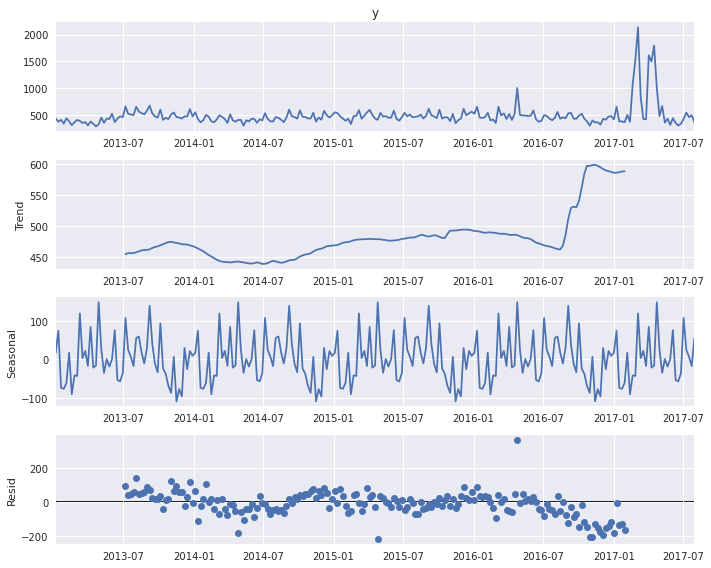

In [239]:
decomposition = sm.tsa.seasonal_decompose(dt_train["y"], period = 52) 
figure = decomposition.plot()
plt.show()

In [241]:
dt_train

index      y       promo
ds                                  
2013-01-06      0  436.0    0.000000
2013-01-13      1  374.0    0.000000
2013-01-20      2  410.0    0.000000
2013-01-27      3  338.0    0.000000
2013-02-03      4  440.0    0.000000
...           ...    ...         ...
2017-07-02    234  428.0    0.584795
2017-07-09    235  545.0   73.737374
2017-07-16    236  459.0  100.000000
2017-07-23    237  495.0  100.000000
2017-07-30    238  366.0   47.239264

[239 rows x 3 columns]

In [242]:
dt_train['lny'] = np.log1p(dt_train['y'])

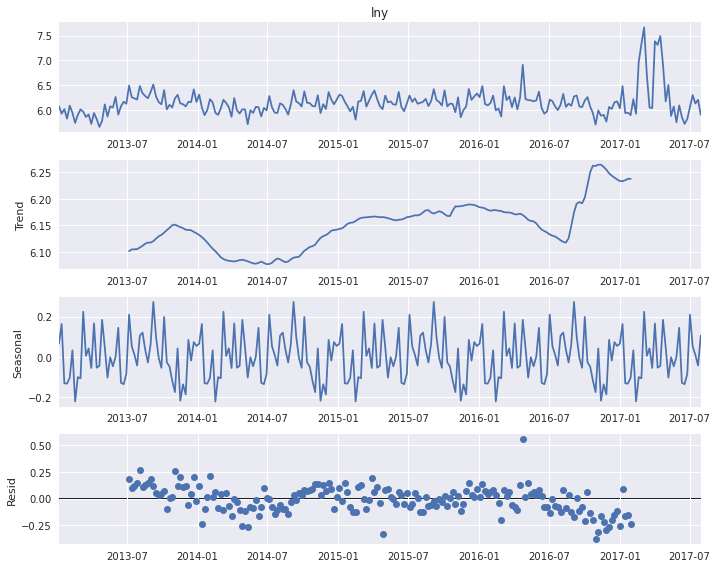

In [243]:
decomposition = sm.tsa.seasonal_decompose(dt_train["lny"], period = 52) 
figure = decomposition.plot()
plt.show()

In [245]:
df = dt_train.rename(columns={'date':'ds', 'unit_sales':'y'})

In [247]:
cutoff_date = '2014-12-31'
xtrain, xvalid  = df.loc[df.index <= cutoff_date], df.loc[(df.index > cutoff_date) & (df.index < '2015-03-31')]
print(xtrain.shape, xvalid.shape)

(104, 4) (13, 4)


In [254]:
!pip install pystan

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [255]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  ERROR: Command errored out with exit status 1:
   command: /home/ec2-user/anaconda3/envs/python3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-r728vvvw/fbprophet_53a4af6ac24549969b90b65759401edf/setup.py'"'"'; __file__='"'"'/tmp/pip-install-r728vvvw/fbprophet_53a4af6ac24549969b90b65759401edf/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-teau4p6_
       cwd: /tmp/pip-install-r728vvvw/fbprophet_53a4af6ac24549969b90b65759401edf/
  Complete output (9 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/fbprophet
  creating build/lib/fbprophet/stan_model
  INFO:pystan:COMP

In [253]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_yearly, add_changepoints_to_plot


ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
m = Prophet()
m.fit(xtrain)
future = m.make_future_dataframe(periods= 30)
forecast = m.predict(future)
fig = m.plot(forecast, figsize=(CFG.img_dim1, CFG.img_dim2), xlabel = '')
a = add_changepoints_to_plot(fig.gca(), m, forecast)